In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
def summary(data):
    return print('Shape:\n', data.shape,'\n\n',
                 'Columns:\n', data.columns,'\n\n',
                 'Data Types:\n', data.dtypes,'\n\n',
                 'Missing:\n', data.isnull().sum(),'\n\n',
                 'First ones:\n', data.head(10),'\n\n',
                 'Last ones:\n', data.tail(10),'\n\n',
                 'Stats:\n', data.describe([0.05,0.25,0.5,0.75,0.95])
                )
def metadata(x_axis, y_axis):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(x_axis, fontsize = 35)
    plt.ylabel(y_axis, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def i_digits(i, digit):
    text = str('{:g}'.format(float('{:.{p}g}'.format(i, p = digit))))
    return text

In [3]:
data = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\data.csv',
    delimiter = ',',
    decimal = '.'
    )

In [4]:
summary(data)

Shape:
 (20000, 303) 

 Columns:
 Index(['id', 'train', 'target_eval', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_291', 'var_292', 'var_293', 'var_294', 'var_295', 'var_296',
       'var_297', 'var_298', 'var_299', 'var_300'],
      dtype='object', length=303) 

 Data Types:
 id               int64
train            int64
target_eval      int64
var_1          float64
var_2          float64
                ...   
var_296        float64
var_297        float64
var_298        float64
var_299        float64
var_300        float64
Length: 303, dtype: object 

 Missing:
 id             0
train          0
target_eval    0
var_1          0
var_2          0
              ..
var_296        0
var_297        0
var_298        0
var_299        0
var_300        0
Length: 303, dtype: int64 

 First ones:
    id  train  target_eval  var_1  var_2  var_3  var_4  var_5  var_6  var_7  \
0   1      1            1  0.422  0.521  0.493  0.206  0.144  0.203  0.70

In [5]:
split = train_test_split(data[data['train'] == 1][data.columns[3:]],
                         data[data['train'] == 1]['target_eval'],
                         train_size = 4/5,
                         random_state = 1
                         )
train_x, test_x, train_y, test_y = split

In [6]:
train_x.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,...,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.47839,0.492545,0.513425,0.519495,0.505090,0.505360,0.468755,0.51550,0.482545,0.495000,...,0.50048,0.501900,0.523695,0.523530,0.449270,0.484135,0.523275,0.517030,0.505545,0.486235
std,0.29152,0.299522,0.289165,0.290706,0.269847,0.299263,0.304788,0.29068,0.290559,0.276159,...,0.29287,0.290783,0.287471,0.300652,0.283049,0.299207,0.275611,0.275493,0.291169,0.270442
min,0.00000,0.000000,0.003000,0.002000,0.001000,0.002000,0.014000,0.01100,0.000000,0.000000,...,0.00300,0.001000,0.012000,0.005000,0.012000,0.001000,0.002000,0.004000,0.001000,0.004000
25%,0.22025,0.219500,0.282250,0.275750,0.292500,0.232500,0.170750,0.26175,0.252500,0.259750,...,0.25525,0.243000,0.273250,0.242250,0.220750,0.222000,0.312750,0.282000,0.251250,0.279250
50%,0.45950,0.478500,0.507500,0.521000,0.502500,0.523000,0.438000,0.53800,0.490000,0.516500,...,0.46050,0.521500,0.569500,0.552000,0.412500,0.464500,0.523000,0.530500,0.491500,0.481500
75%,0.74300,0.735250,0.778500,0.774750,0.751000,0.765500,0.732250,0.75650,0.727250,0.720000,...,0.76800,0.738250,0.755000,0.801000,0.688250,0.761000,0.748500,0.746250,0.760250,0.705000
max,0.99900,0.996000,0.988000,0.996000,0.979000,0.995000,0.974000,0.99700,0.988000,0.997000,...,0.99900,0.999000,1.000000,0.994000,0.998000,0.998000,1.000000,0.997000,0.995000,0.996000


In [7]:
test_x.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.446840,0.487340,0.549980,0.518520,0.516540,0.557020,0.498060,0.482980,0.490780,0.493840,...,0.511820,0.433540,0.544720,0.483200,0.502820,0.523060,0.568140,0.509420,0.553960,0.492860
std,0.287697,0.293059,0.299193,0.313253,0.286318,0.315136,0.312829,0.285014,0.304855,0.311532,...,0.285428,0.254967,0.258225,0.253729,0.271735,0.274041,0.304138,0.290467,0.260108,0.273683
min,0.003000,0.044000,0.005000,0.007000,0.023000,0.008000,0.002000,0.017000,0.001000,0.006000,...,0.018000,0.029000,0.067000,0.061000,0.020000,0.001000,0.008000,0.015000,0.034000,0.007000
25%,0.199750,0.242500,0.325250,0.250000,0.221250,0.304750,0.218000,0.273250,0.192500,0.172000,...,0.243750,0.240750,0.329500,0.273000,0.248000,0.341750,0.307250,0.300000,0.287250,0.280750
50%,0.420000,0.509000,0.548500,0.519000,0.574000,0.606500,0.479500,0.404500,0.546000,0.531500,...,0.545500,0.388000,0.517500,0.464500,0.495000,0.475500,0.633000,0.539000,0.562000,0.442500
75%,0.703250,0.719250,0.824750,0.801750,0.745500,0.853750,0.778500,0.766000,0.732500,0.757250,...,0.749250,0.646750,0.781000,0.641750,0.743500,0.751000,0.827250,0.748250,0.768750,0.729000
max,0.974000,0.999000,0.995000,0.998000,0.947000,0.996000,0.996000,0.970000,0.995000,0.996000,...,0.992000,0.962000,0.975000,0.996000,0.977000,0.990000,0.999000,0.990000,0.995000,0.982000


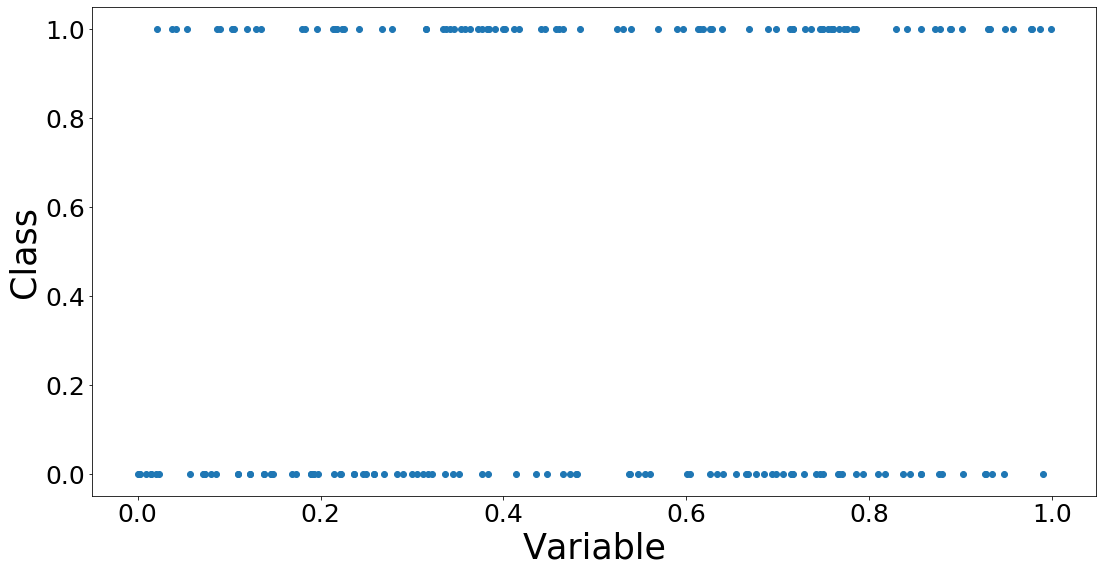

In [9]:
plt.figure(figsize = (18, 9))
metadata('Variable', 'Class')
plt.plot(train_x['var_1'], train_y, 'o')

In [19]:
columns = train_x.columns
dummy = list(range(len(columns)))
corr = pd.DataFrame({'Var':columns,
                    'Biserial':dummy,
                    'P-val':dummy
                    })
for i in dummy:
    biser = stats.pointbiserialr(train_x[columns[i]],
                                 train_y,
                                 )
    corr['Biserial'].iloc[i] = biser[0]
    corr['P-val'].iloc[i] = biser[1]
corr['Signif'] = 1 - corr['P-val']

C:\Users\nahue\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


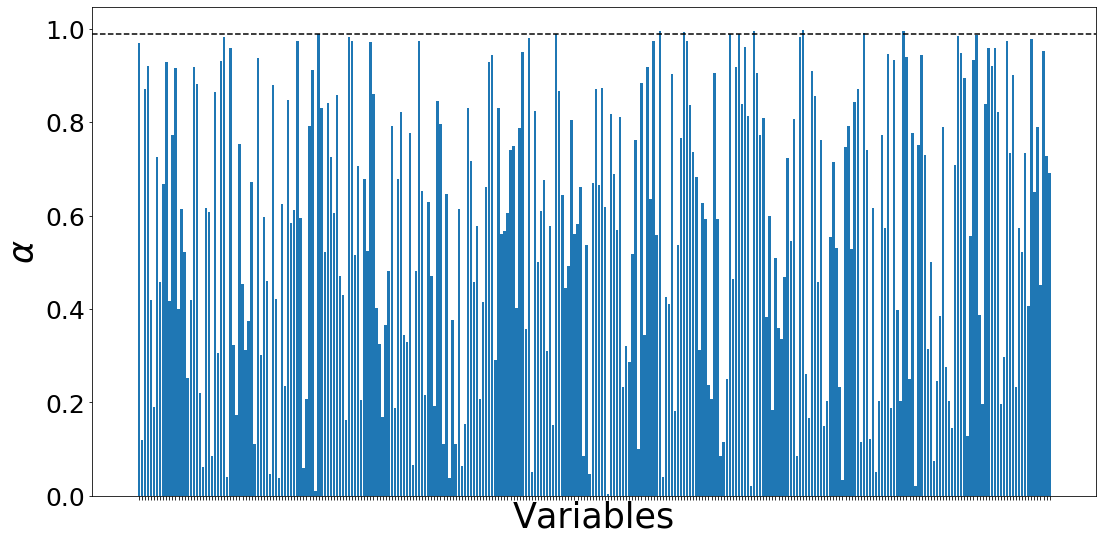

In [20]:
plt.figure(figsize = (18, 9))
plt.bar(corr['Var'], corr['Signif'])
metadata('Variables', '$\\alpha$')
plt.axhline(0.99, color = 'black', ls = '--')
plt.tick_params(axis = 'x', labelbottom = False)

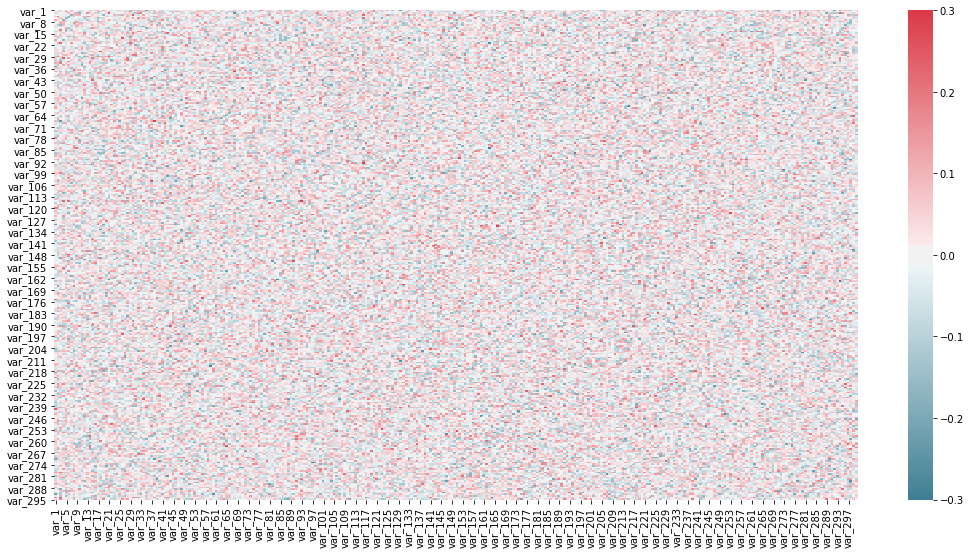

In [21]:
pearson = train_x.corr()
np.fill_diagonal(pearson.values, np.nan)
plt.figure(figsize = (18, 9))
sns.heatmap(pearson, vmin = -0.3, vmax = 0.3,
            cmap = sns.diverging_palette(220, 10, as_cmap = True)
           )

In [35]:
%%time
def regularization(j):
    reg = np.logspace(-j, j, num = 2*j + 1)
    return reg
ratio = np.arange(0, 1.1, 0.1)
fifty = np.arange(50, 2050, 50)
unit =  np.arange(0, 101, 1)
depth = np.arange(1, 6, 1)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
n_kernel = len(kernel)
for i in ratio:
    kernel = np.concatenate((kernel, ratio*RBF(i)))
grid = [{'logisticregression__C': regularization(25),
       'logisticregression__l1_ratio': ratio
        },
        {'kneighborsclassifier__n_neighbors': unit,
        'kneighborsclassifier__weights': ['uniform', 'distance']
        },
        {'radiusneighborsclassifier__radius': ratio,
         'radiusneighborsclassifier__weights': ['uniform', 'distance']
        },
        {'svc__C': regularization(10),
        'svc__kernel': kernel[:n_kernel],
        'svc__degree': [2, 3]
        },
        {'nusvc__nu': ratio[1:],
        'nusvc__kernel': kernel[:n_kernel],
        'nusvc__degree': [2, 3]
        },
        {'gaussianprocessclassifier__kernel': kernel[n_kernel:]
        },
        {'decisiontreeclassifier__min_samples_leaf': unit[:11],
        'decisiontreeclassifier__max_depth': depth,
        'decisiontreeclassifier__max_features': fifty[:6]
        },
        {'randomforestclassifier__min_samples_leaf': unit[:11],
        'randomforestclassifier__max_depth': depth,
        'randomforestclassifier__max_features': fifty[:6]
        },
        {'adaboostclassifier__n_estimators': fifty
        },
        {'gradientboostingclassifier__min_samples_leaf': unit[:11],
        'gradientboostingclassifier__max_depth': depth,
        'gradientboostingclassifier__max_features': fifty[:6]
        },
        {'gaussiannb__var_smoothing': regularization(20)},
        {'lineardiscriminantanalysis__shrinkage': ratio
        },
        {'quadraticdiscriminantanalysis__reg_param': ratio
        }
       ]
classifiers = [LogisticRegression(penalty = 'elasticnet',
                                  solver = 'saga'
                                  ),
               KNeighborsClassifier(),
               RadiusNeighborsClassifier(outlier_label = 'most_frecuent'),
               SVC(probability = True),
               NuSVC(probability = True),
               GaussianProcessClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               GaussianNB(),
               LinearDiscriminantAnalysis(solver = 'lsqr'),
               QuadraticDiscriminantAnalysis()
              ]
result = list(range(len(classifiers)))
for i in result:
    print('Starting...' + str(i) + ' of ' + str(result[-1]))
    pipe = make_pipeline(StandardScaler(),
                         classifiers[i]
                         )
    clf_grid = GridSearchCV(pipe,
                            grid[i],
                            scoring = 'roc_auc',
                            cv = 5,
                            refit = False,
                            n_jobs = -2,
                            verbose = 2
                            )
    fitted = clf_grid.fit(train_x,
                          train_y
                          )
    result[i] = pd.DataFrame(fitted.cv_results_)

Starting...0 of 12
Fitting 5 folds for each of 561 candidates, totalling 2805 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  40 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-2)]: Done 978 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-2)]: Done 1559 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-2)]: Done 1842 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-2)]: Done 2207 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 2652 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-2)]: Done 2805 out of 2805 | elapsed:  2.3min finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...1 of 12
Fitting 5 folds for each of 202 candidates, totalling 1010 fits


[Parallel(n_jobs=-2)]: Done 115 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-2)]: Done 999 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-2)]: Done 1010 out of 1010 | elapsed:   10.9s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...2 of 12
Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-2)]: Done 101 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-2)]: Done 110 out of 110 | elapsed:    0.9s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...3 of 12
Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-2)]: Done 110 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-2)]: Done 594 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-2)]: Done 835 out of 840 | elapsed:   21.5s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 840 out of 840 | elapsed:   21.6s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...4 of 12
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-2)]: Done  64 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-2)]: Done 306 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-2)]: Done 395 out of 400 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:   10.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...5 of 12
Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-2)]: Done 605 out of 605 | elapsed:  1.8min finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...6 of 12
Fitting 5 folds for each of 330 candidates, totalling 1650 fits


[Parallel(n_jobs=-2)]: Done 115 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 1083 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-2)]: Done 1650 out of 1650 | elapsed:   15.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...7 of 12
Fitting 5 folds for each of 330 candidates, totalling 1650 fits


[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-2)]: Done 1007 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-2)]: Done 1452 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-2)]: Done 1650 out of 1650 | elapsed:  7.6min finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...8 of 12
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed: 11.7min finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...9 of 12
Fitting 5 folds for each of 330 candidates, totalling 1650 fits


[Parallel(n_jobs=-2)]: Done  64 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-2)]: Done 279 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-2)]: Done 482 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 765 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done 1130 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-2)]: Done 1575 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-2)]: Done 1650 out of 1650 | elapsed:  8.3min finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...10 of 12
Fitting 5 folds for each of 41 candidates, totalling 205 fits


[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done 205 out of 205 | elapsed:    1.5s finished


Starting...11 of 12
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  55 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-2)]: Done  55 out of  55 | elapsed:    1.8s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Starting...12 of 12
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Wall time: 32min 46s


[Parallel(n_jobs=-2)]: Done  50 out of  55 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done  55 out of  55 | elapsed:    0.8s finished


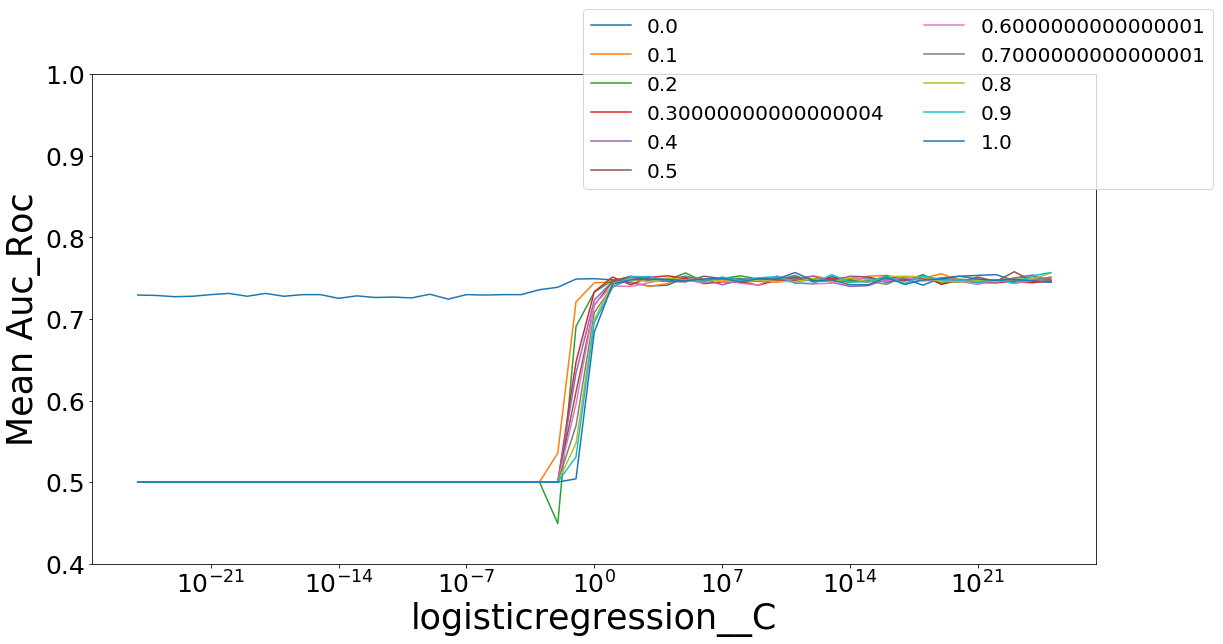

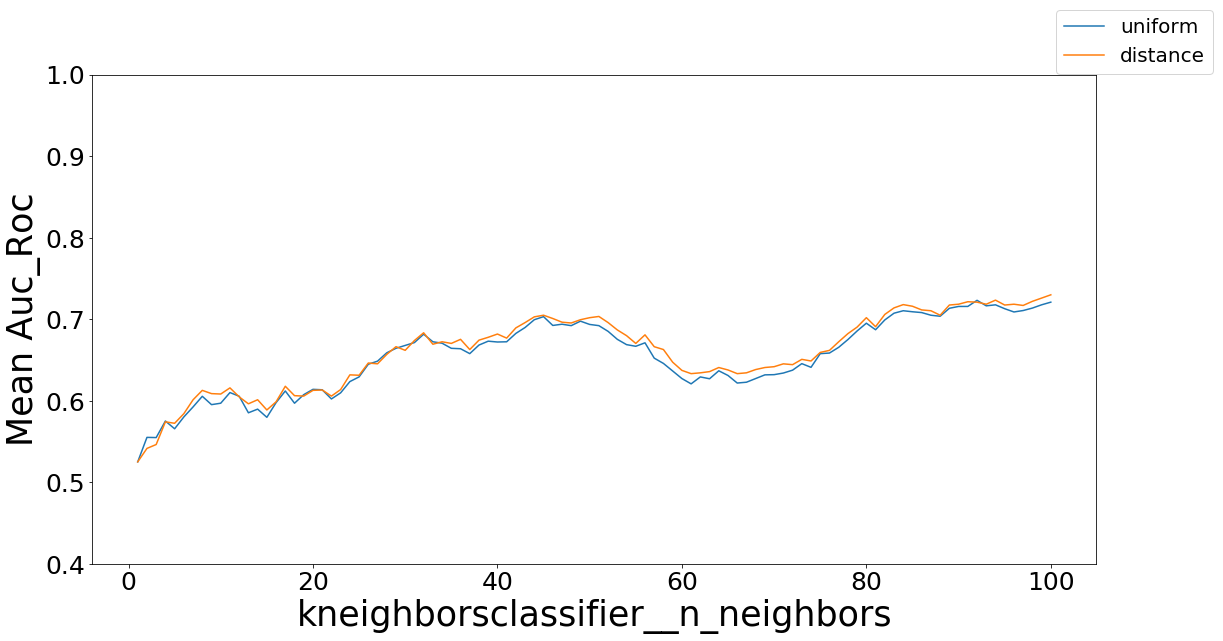

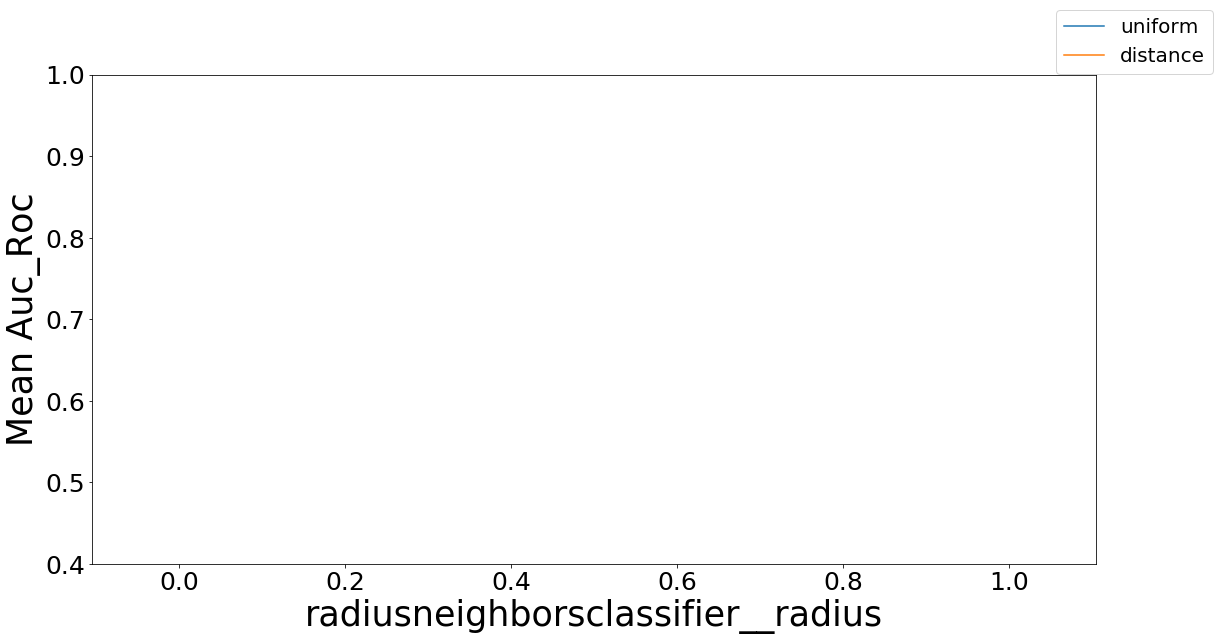

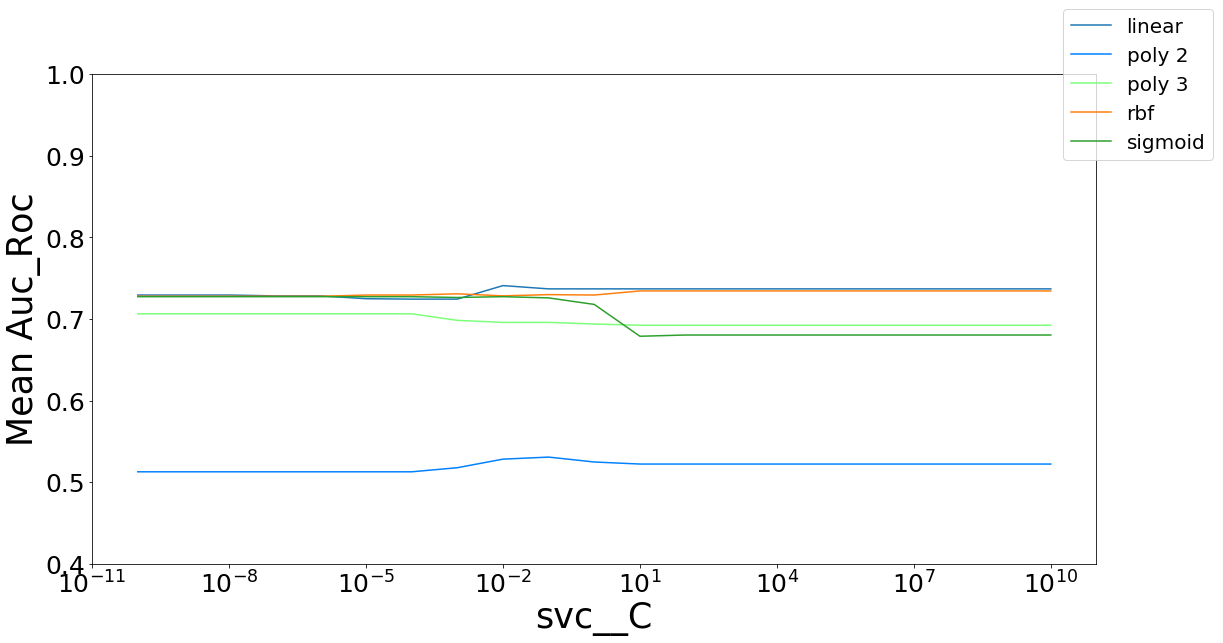

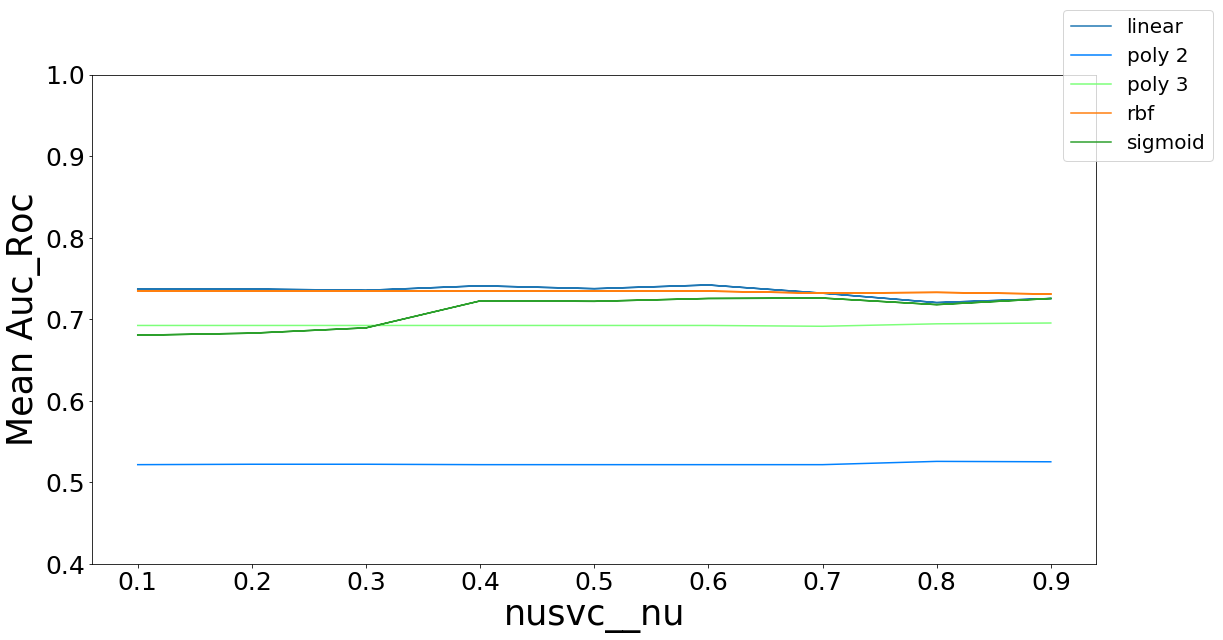

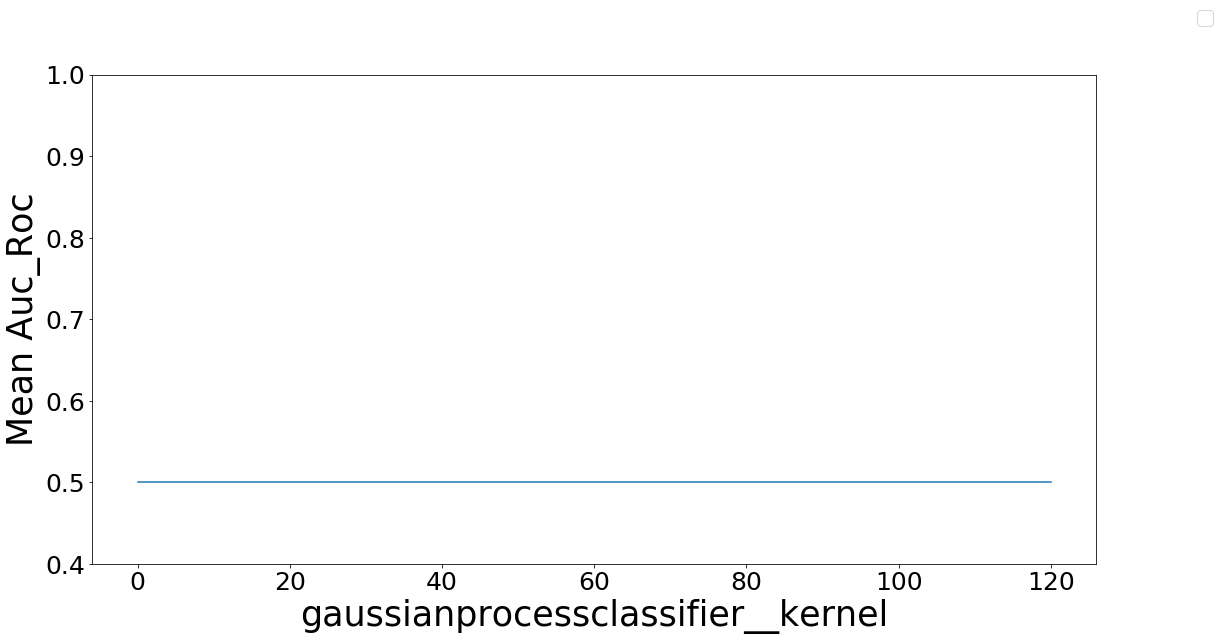

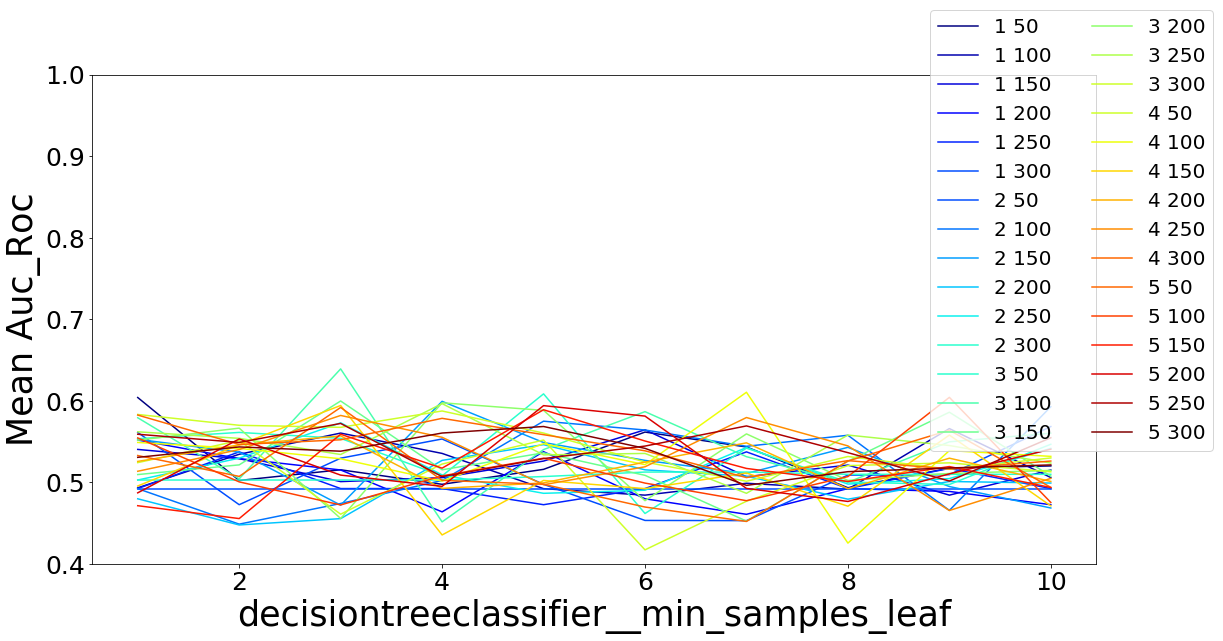

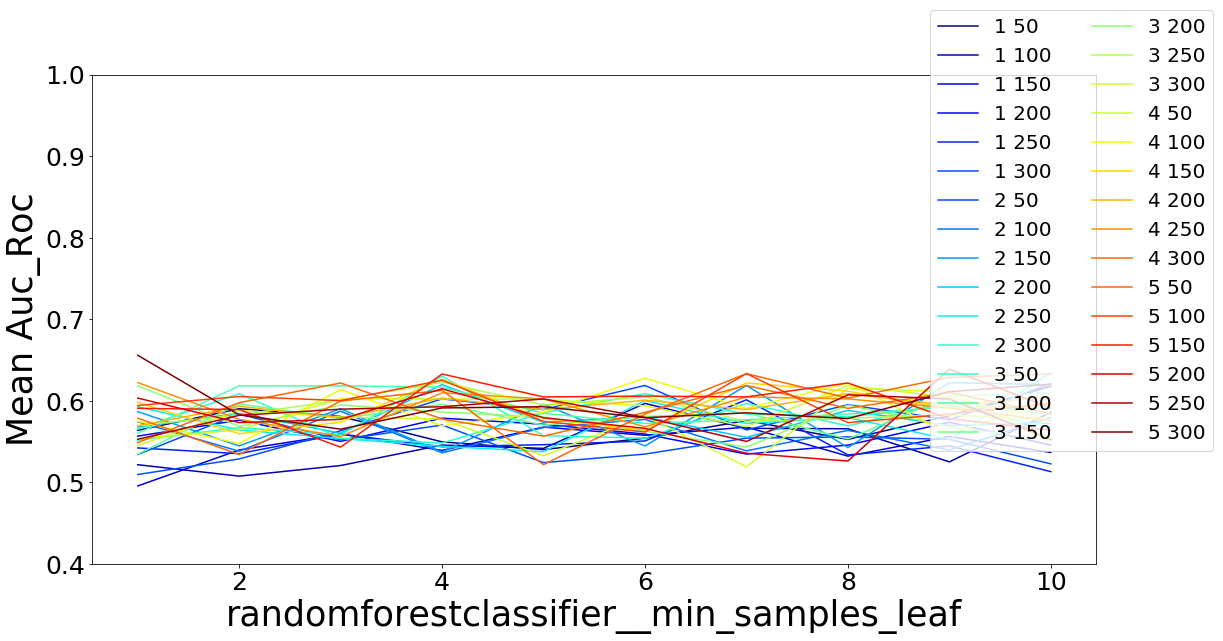

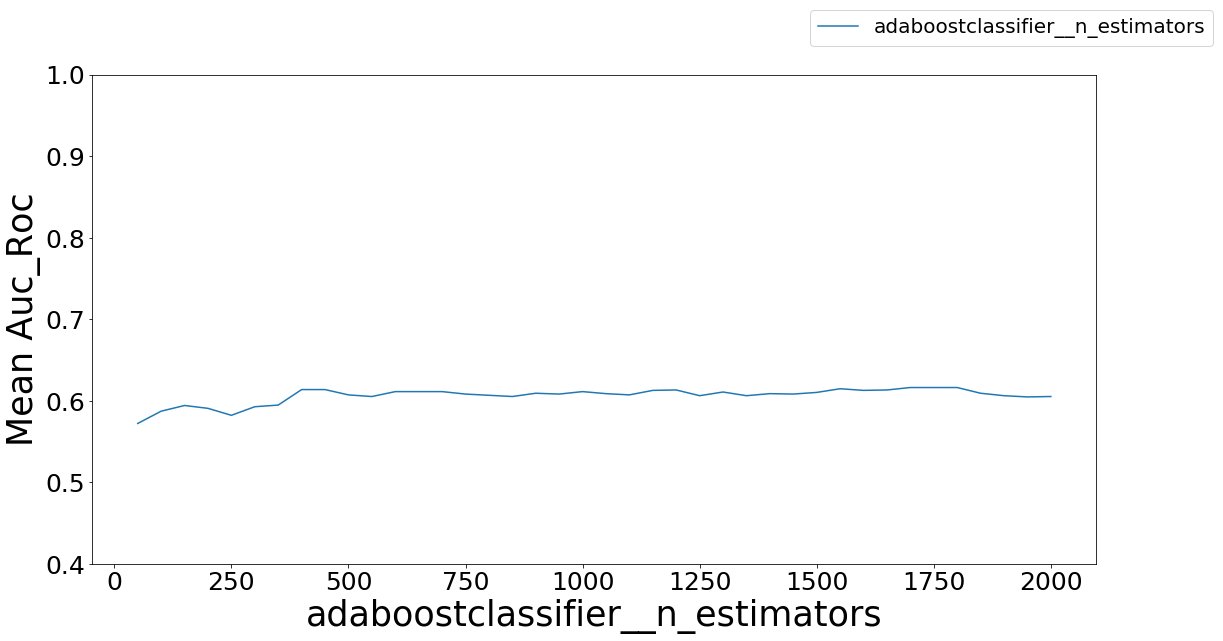

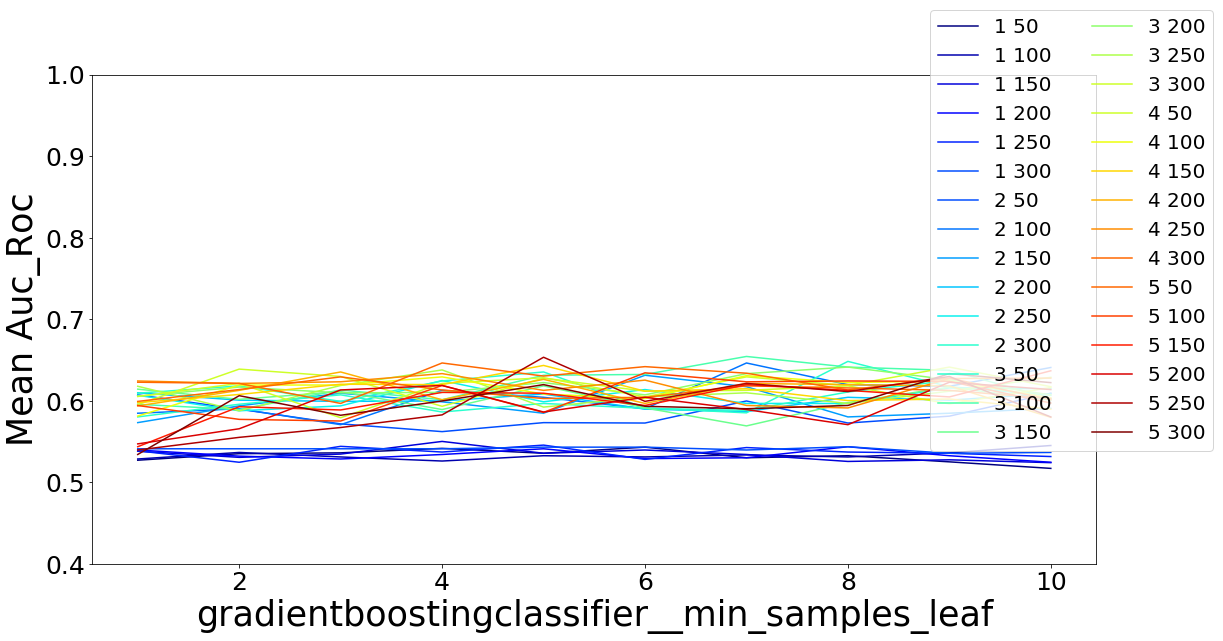

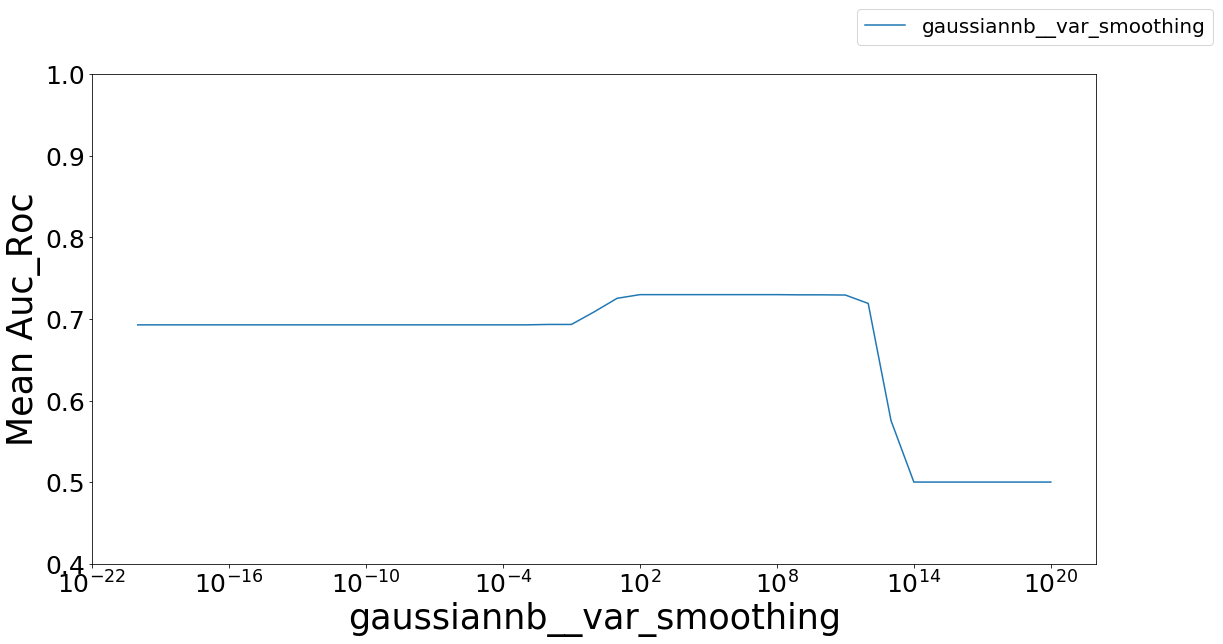

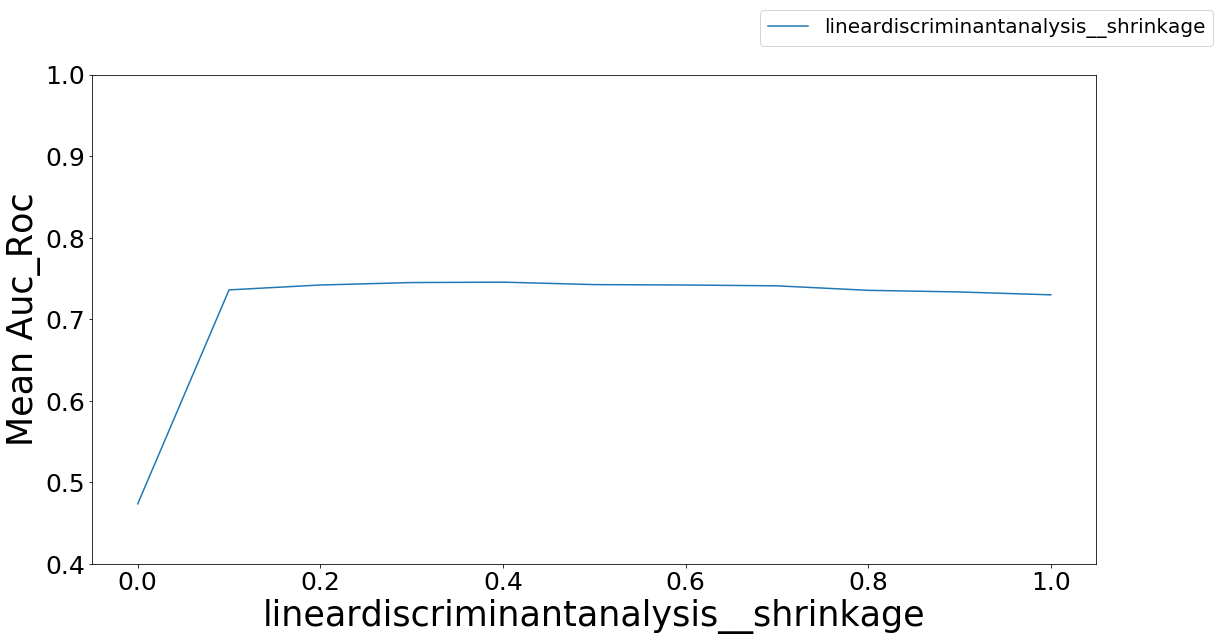

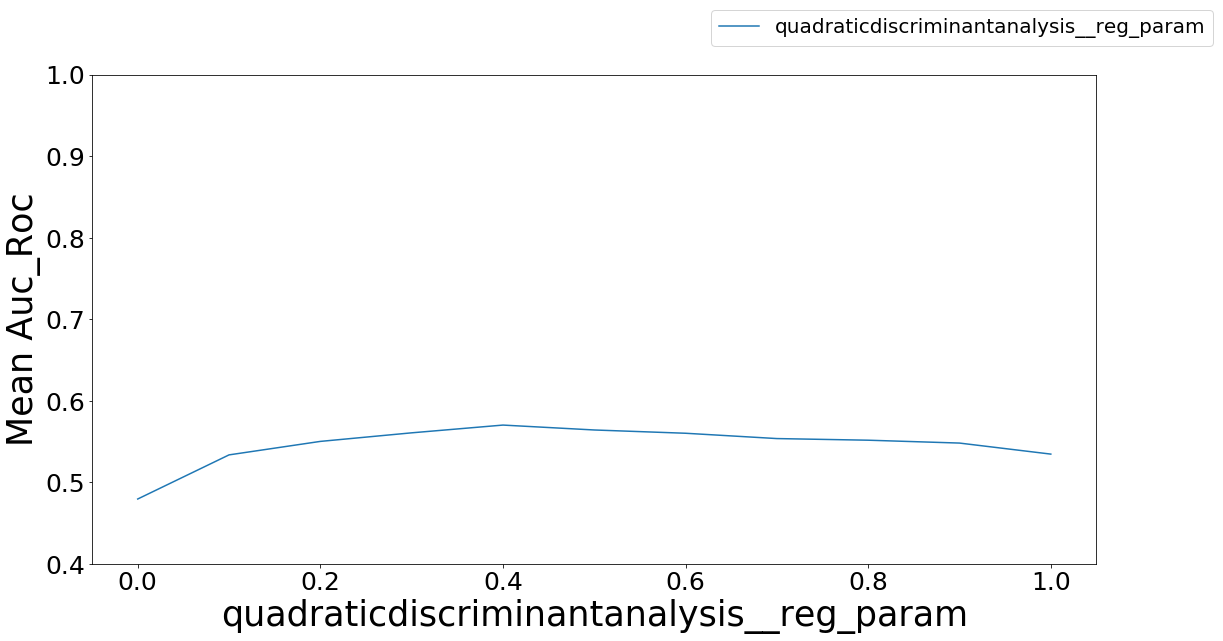

In [74]:
for j in range(len(grid)):
    key = list(grid[j].keys())
    plt.figure(figsize = (18, 9))
    metadata(key[0], 'Mean Auc_Roc')
    plt.ylim([0.4, 1])
    legend = []
    if len(key) == 1:
        model = result[j]
        if key[0] == 'gaussianprocessclassifier__kernel':
            x = list(range(len(model['mean_test_score'])))
            plt.plot(x, model['mean_test_score'])
        else:
            plt.plot(model['param_' + key[0]],
                     model['mean_test_score'],
                     )
            legend = legend + [str(key[0])]
    else:
        param_1 = result[j]['param_' + key[1]].unique()
        for i in range(len(param_1)):
            color = np.linspace(0, 1, len(param_1) + 1)
            if param_1[i] == 'poly' or key[0][-4:] == 'leaf':
                param_2 = result[j]['param_' + key[2]].unique()
                colors = plt.cm.jet(np.linspace(color[i],
                                                color[i+1],
                                                len(param_2)
                                               )
                                   )
                for k in range(len(param_2)):
                    model = result[j][(result[j]['param_' + key[1]] == param_1[i])
                                      & (result[j]['param_' + key[2]] == param_2[k])
                                     ]
                    plt.plot(model['param_' + key[0]],
                             model['mean_test_score'],
                             color = colors[k]
                             )
                    legend = legend + [str(param_1[i]) +
                                       ' ' +
                                       str(param_2[k])
                                      ]
            else:
                model = result[j][result[j]['param_' + key[1]] == param_1[i]]
                plt.plot(model['param_' + key[0]],
                         model['mean_test_score'],
                         )
                legend = legend + [str(param_1[i])]
    if len(legend) > 5:
        col = 2
    else:
        col = 1
    plt.figlegend(legend,
                  fontsize = 20,
                  ncol = col
                  )
    if key[0][-1] == 'C' or key[0][-1] == 'g':
        plt.xscale('log')
    plt.savefig('C:\\Users\\nahue\\Desktop\\Img\\' + key[0] + '.png')

Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-2)]: Done 505 out of 505 | elapsed:    5.0s finished


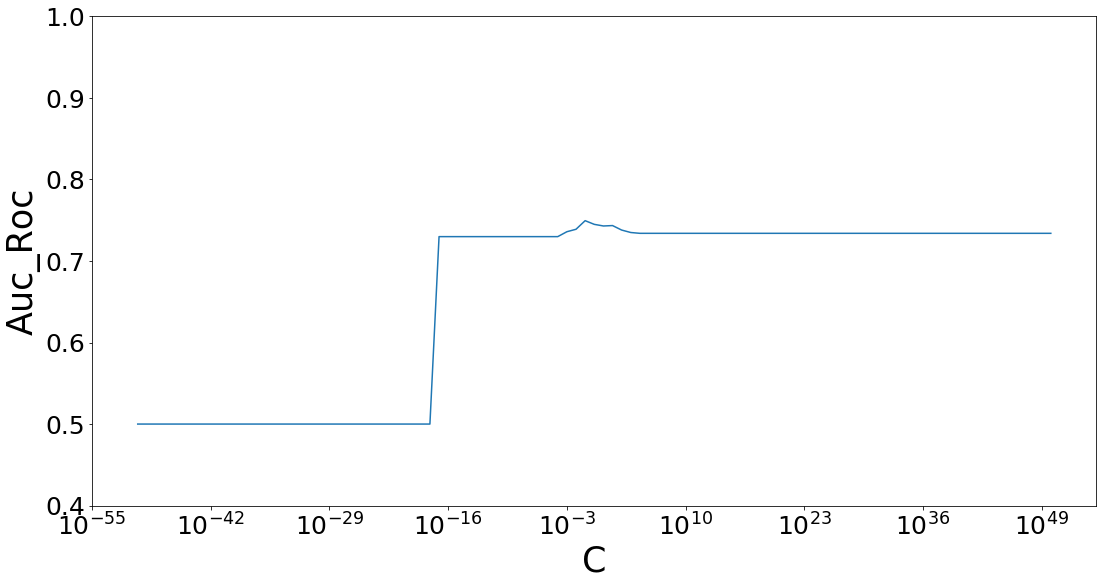

In [17]:
pipe = make_pipeline(StandardScaler(),
                     LogisticRegression(penalty = 'l2',
                                        solver = 'liblinear'
                                        )
                     )
grid = [{'logisticregression__C': regularization(50)}]
clf_grid = GridSearchCV(pipe,
                        grid,
                        scoring = 'roc_auc',
                        cv = 5,
                        refit = False,
                        n_jobs = -2,
                        verbose = 2
                        )
fitted = clf_grid.fit(train_x,
                      train_y
                      )
result_log = pd.DataFrame(fitted.cv_results_)
plt.figure(figsize = (18, 9))
plt.ylim([0.4, 1])
plt.xscale('log')
metadata('C', 'Auc_Roc')
plt.plot(result_log['param_logisticregression__C'],
                    result_log['mean_test_score']
                    )

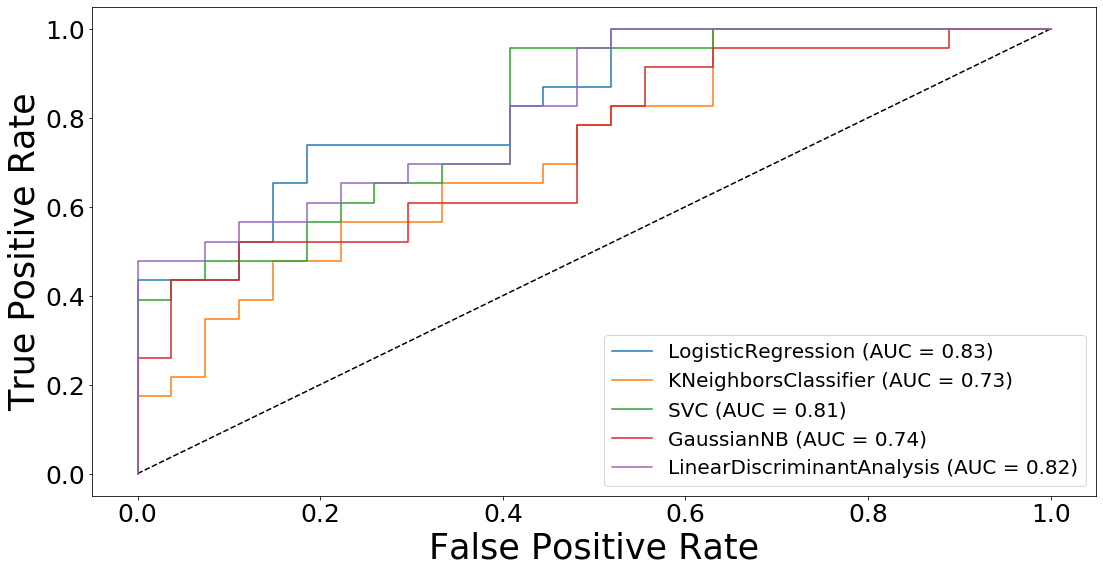

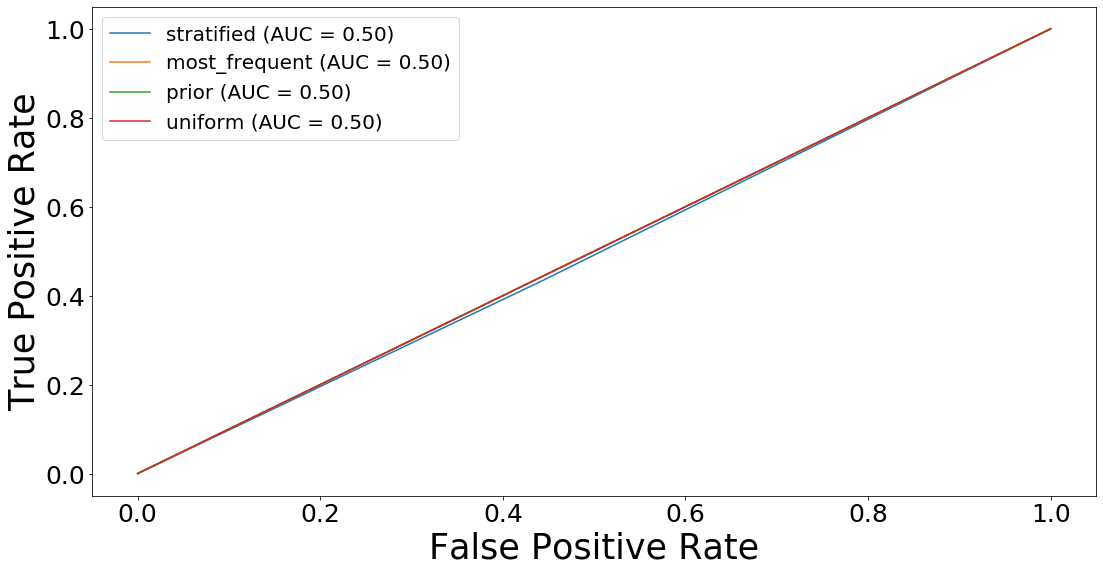

In [12]:
strategies = ['stratified', 'most_frequent',
              'prior', 'uniform'
             ]
candidates = [LogisticRegression(penalty = 'none',
                                 solver = 'saga',
                                 max_iter = 2000
                                 ),
              KNeighborsClassifier(weights = 'distance',
                                   n_neighbors = 100 
                                   ),
              SVC(probability = True,
                 kernel = 'linear',
                 C = 10**-2
                 ),
              GaussianNB(var_smoothing = 10**5),
              LinearDiscriminantAnalysis(solver = 'lsqr',
                                         shrinkage = 0.4
                                         )
             ]
final_result = list(range(len(candidates)))
dummy_result = list(range(len(strategies)))
all_models = []
fig1, ax1 = plt.subplots(figsize = (18, 9))
plt.plot([0, 1], [0, 1], color = 'black', ls = '--')
metadata('False positive rate', 'True positive rate')
for i in final_result:
    final_pipe = make_pipeline(StandardScaler(),
                               candidates[i]
                               )
    fitted = final_pipe.fit(train_x, train_y)
    model = str(candidates[i])
    plot_roc_curve(fitted, test_x, test_y,
                   name = model[:model.index('(')],
                   ax = ax1
                  )
    all_models = all_models + [(model, fitted)]
plt.legend(fontsize = 20)
plt.savefig('C:\\Users\\nahue\\Desktop\\Img\\Methods.png')
fig2, ax2 = plt.subplots(figsize = (18, 9))
plt.plot([0, 1], [0, 1], color = 'black', ls = '--')
metadata('False positive rate', 'True positive rate')
for j in dummy_result:
    dummy_pipe = make_pipeline(StandardScaler(),
                               DummyClassifier(random_state = 1,
                                               strategy = strategies[j]
                                               )
                               )
    fitted = dummy_pipe.fit(train_x, train_y)
    plot_roc_curve(fitted, test_x, test_y,
                   name = strategies[j],
                   ax = ax2
                  )
plt.legend(fontsize = 20)
plt.savefig('C:\\Users\\nahue\\Desktop\\Img\\Dummy.png')

In [13]:
x = data[data['train'] == 1][data.columns[3:]]
y = data[data['train'] == 1]['target_eval']
final_model = make_pipeline(StandardScaler(),
                            candidates[0]
                            ).fit(x, y)
to_predict = data[data['train'] == 0][data.columns[3:]]
output = final_model.predict_proba(to_predict)

In [14]:
dataframe = pd.DataFrame({'id':data[data['train'] == 0]['id'].values,
                          'Proba':output[:,1]}
                        )
dataframe.to_csv('C:\\Users\\nahue\\Desktop\\Output.csv',
                 sep = ',',
                 index = False,
                 header = False
                 )